In [79]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats


Exercise 8.18

In [69]:
data = {
        'A' : [9,9,9,12,12,12,15,15,15],
        'B' : [9,12,15,9,12,15,9,12,15]
}

df = pd.DataFrame(data)

#creating mean column
df['C'] = df.mean(axis = 1)

#creating mean tables
mean_data ={

}

df_mean = pd.DataFrame(mean_data)
#creating the xbar column
df_mean['D'] = (9,10.5,12,13.5,15)
#creating the pxbar column
df_mean['E'] = [(1/9),(2/9),(3/9),(2/9),(1/9)]
#creating the pxxbar
df_mean['F'] = (df_mean['D']*df_mean['E'])
F_sum = df_mean['F'].sum()
#creating the xb2pbr
df_mean['G'] = (df_mean['D']**2 )*(df_mean['E'])
G_sum = df_mean['G'].sum()

print(df)
print(df_mean)

    A   B     C
0   9   9   9.0
1   9  12  10.5
2   9  15  12.0
3  12   9  10.5
4  12  12  12.0
5  12  15  13.5
6  15   9  12.0
7  15  12  13.5
8  15  15  15.0
      D         E         F     G
0   9.0  0.111111  1.000000   9.0
1  10.5  0.222222  2.333333  24.5
2  12.0  0.333333  4.000000  48.0
3  13.5  0.222222  3.000000  40.5
4  15.0  0.111111  1.666667  25.0


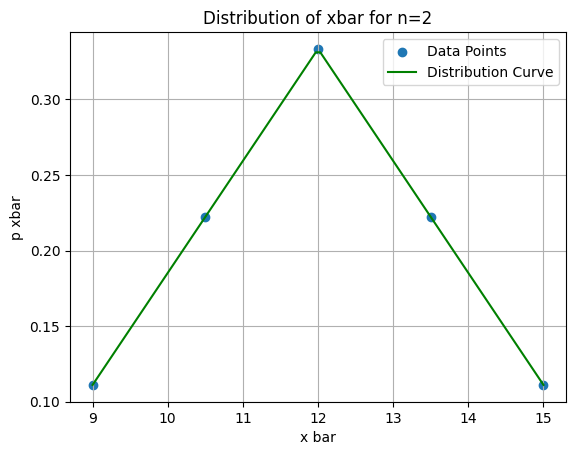

In [71]:
#plotting the graph
x = df_mean['D']
y = df_mean['E']

x_smooth = np.linspace(min(x), max(x), 100)
y_smooth = np.interp(x_smooth, x, y)


plt.scatter(x, y, label='Data Points')

plt.plot(x_smooth, y_smooth, label='Distribution Curve', color='green')

plt.xlabel('x bar')
plt.ylabel('p xbar')
plt.title('Distribution of xbar for n=2')
plt.legend()
plt.grid(True)
plt.show()

Exercise 8.21

A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population.Find

(a) the population mean

(b) the population standard deviation

(c) the mean of the sampling distribution of means, and

(d) the standard deviation of the sampling
distribution of means.

Verify parts (c) and (d ) directly from (a) and (b) by using suitable formulas.

In [53]:
data = [3,7,11,15]

#population mean
population_mean = np.mean(data)
#population standard deviation
population_stdev = np.std(data, ddof=0)

sample_size = 2
#sampling distribution mean
sdistribution_mean = population_mean
#standard deviation of the sampling distribution of means
sdistribution_stdev = population_stdev/np.sqrt(sample_size)

print(f"(a) population mean : {population_mean}")
print(f"(b) population standard deviation : {population_stdev:.4f}")
print(f"(c) mean of the sampling distribution of means : {sdistribution_mean}")
print(f"(d) standard deviation of the sampling distribution of means : {sdistribution_stdev:.4f}")

(a) population mean : 9.0
(b) population standard deviation : 4.4721
(c) mean of the sampling distribution of means : 9.0
(d) standard deviation of the sampling distribution of means : 3.1623


Exercise 8.34

Find the probability that of the next 200 children born

(a) less than 40% will be boys

(b) between 43% and 57% will be girls, and

(c) more than 54% will be boys. Assume equal probabilities for the births of boys and
girls.


In [60]:
from scipy.stats import binom

n = 200  # Number of trials (births)
p = 0.5  # Probability of a boy/girl for each birth

a_pop = 0.4*n
# Calculate the probability that X < 80
probability_a = binom.cdf(a_pop, n, p)
print(f"(a) Probability that less than 40% are boys: {probability_a:.6f}")

#b
b_upper = 0.57*n
b_lower = 0.43*n
probability_b = binom.cdf(b_upper, n, p) - binom.cdf(b_lower-1, n, p)
print(f"(b) Probability that between 43% and 57% are girls: {probability_b:.6f}")

#c

c_pop = 0.54*n
probability_c = 1 - binom.cdf(c_pop-1, n, p)
print(f"(c) Probability that more than 54% are boys: {probability_c:.6f}")


(a) Probability that less than 40% are boys: 0.002843
(b) Probability that between 43% and 57% are girls: 0.951999
(c) Probability that more than 54% are boys: 0.144410


In [78]:
import itertools

x_values = [6, 9, 12, 15, 18]
p_values = [0.1, 0.2, 0.4, 0.2, 0.1]
sample_size = 2

# Calulating for μ
mean = sum(x * p for x, p in zip(x_values, p_values))

# Calculating for σ^2
variance = sum((x - mean) ** 2 * p for x, p in zip(x_values, p_values))

# Generate all possible samples of size 2 (with replacement)
samples = list(itertools.product(x_values, repeat=sample_size))

# mean and probabilities of each sample
sample_means = [(sum(sample) / sample_size) for sample in samples]
sample_probabilities = [p1 * p2 for p1, p2 in itertools.product(p_values, repeat=sample_size)]


#inserting the data into a dataframe
data = {
    "Sample": samples,
    "Mean": sample_means,
    "Probability": sample_probabilities
}

df = pd.DataFrame(data)

print(f"mean (μ) of the data : {mean:.2f}")
print(f"variance (σ^2) of the data : {variance:.2f}\n")
print("25 possible samples of size 2, together with their mean and probability \n")
print(df)

mean (μ) of the data : 12.00
variance (σ^2) of the data : 10.80

25 possible samples of size 2, together with their mean and probability 

      Sample  Mean  Probability
0     (6, 6)   6.0         0.01
1     (6, 9)   7.5         0.02
2    (6, 12)   9.0         0.04
3    (6, 15)  10.5         0.02
4    (6, 18)  12.0         0.01
5     (9, 6)   7.5         0.02
6     (9, 9)   9.0         0.04
7    (9, 12)  10.5         0.08
8    (9, 15)  12.0         0.04
9    (9, 18)  13.5         0.02
10   (12, 6)   9.0         0.04
11   (12, 9)  10.5         0.08
12  (12, 12)  12.0         0.16
13  (12, 15)  13.5         0.08
14  (12, 18)  15.0         0.04
15   (15, 6)  10.5         0.02
16   (15, 9)  12.0         0.04
17  (15, 12)  13.5         0.08
18  (15, 15)  15.0         0.04
19  (15, 18)  16.5         0.02
20   (18, 6)  12.0         0.01
21   (18, 9)  13.5         0.02
22  (18, 12)  15.0         0.04
23  (18, 15)  16.5         0.02
24  (18, 18)  18.0         0.01
